# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2018/issues/1). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

Training and testing set
---------------------------

In order to split my data into a training and a testing set, I am using the function `train_test_split`. As the data set is simple, there is no need to use heavy methods. I want a training set large enough while still testing most of the case, therefore I made the choice of 80% of the data for training.

Best splitting
----------------

By simply looking at the second graphs, it seems that 100% of the data for the training set is the best repartition.
But as the testing dataset tends to zero, the testing performance becomes meaningless as it contains a negligible set of data.
From a few simulations, it seems that the best splitting is between 20% and 80% for the training set (and with theses data). At lower value we are under fitting and at high we are over fitting.
For theses data, I would go with 80%

For the performance on the training set, we should not be very dependant on the ratio (if we have a representative sample) as we are always fitting and evaluating the same data.
For the performance on the test set, we are strongly dependent on how good we are at fitting, therefore it is more reprensentative of the model accuracy and does not correlate with the training performance.

Number of neighbors
----------------------

The testing and training performance are correlated as with a low number of neighbors we are just too sensitive to the noise and at high number we are just taking the larger number of red or blue points in the box.

A high number of neighbors is a more simple model as it tends toward giving the same color for every points.

The best setting is around 10-15 as at lower neighbors we are too influenced by noise and at high we are not modelizing anything.

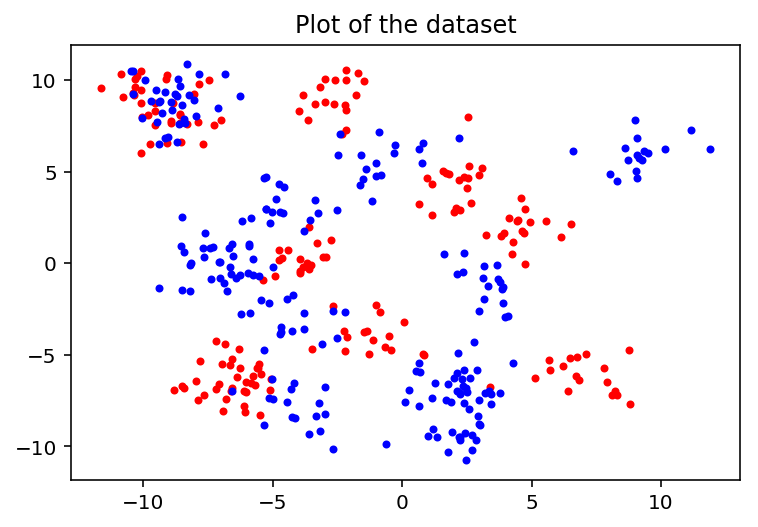

Performance Training: 0.919
Performance Test:     0.850


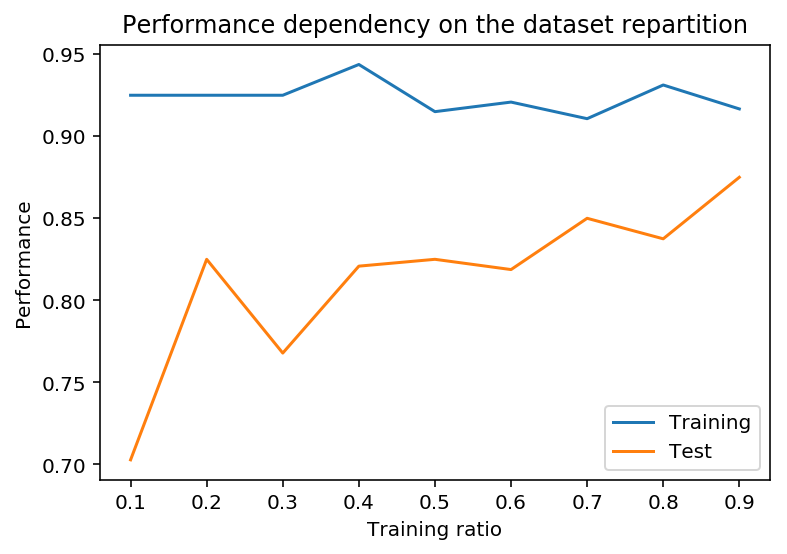

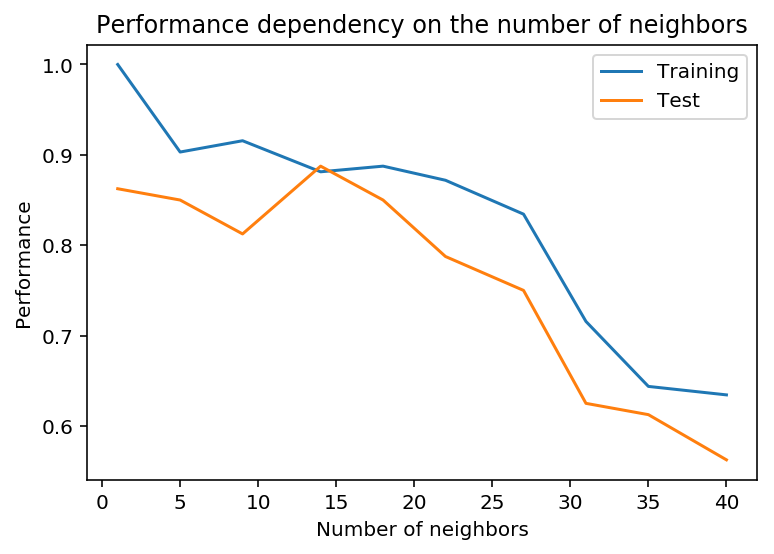

In [3]:
# Your solution
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

# plot dataset
plt.figure()
plt.title("Plot of the dataset")
# red points
ind = y == "r"
plt.plot(X[ind,0], X[ind,1], ".", color="r")
# blue points
ind = y == "b"
plt.plot(X[ind,0], X[ind,1], '.', color="b")
plt.show()

# split data
r_train = 0.8 # training ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=r_train, test_size=1.-r_train)

# fit data
neighbors = 3
knc = KNeighborsClassifier(n_neighbors=neighbors)
knc.fit(X_train, y_train)

print("Performance Training: %.3f" % knc.score(X_train, y_train))
print("Performance Test:     %.3f" % knc.score(X_test, y_test))

# analyze training ratio
neighbors = 2
test = np.linspace(0.1, 0.9, 9)
perf_train = []
perf_test = []

knc = KNeighborsClassifier(n_neighbors=neighbors)
for r_train in test:
    # set up knc
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=r_train, test_size=1-r_train)
    knc.fit(X_train, y_train)
    
    # cmpute error
    perf_train.append(knc.score(X_train, y_train))
    perf_test.append(knc.score(X_test, y_test))
    
plt.figure()
plt.title("Performance dependency on the dataset repartition")
plt.plot(test, perf_train, label="Training")
plt.plot(test, perf_test, label="Test")
plt.xlabel("Training ratio")
plt.ylabel("Performance")
plt.legend()
plt.show()

# analyze number of neighbors
r_train = 0.8
test = np.linspace(1,40,10).astype(np.int)
perf_test = []
perf_train = []

for neighbors in test:
    # set up knc
    knc = KNeighborsClassifier(n_neighbors=neighbors)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=r_train, test_size=1-r_train)
    knc.fit(X_train, y_train)
    
    # compute error
    perf_train.append(knc.score(X_train, y_train))
    perf_test.append(knc.score(X_test, y_test))

plt.figure()
plt.title("Performance dependency on the number of neighbors")
plt.plot(test, perf_train, label="Training")
plt.plot(test, perf_test, label="Test")
plt.xlabel("Number of neighbors")
plt.ylabel("Performance")
plt.legend()
plt.show()


---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [4]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

Influence of the number of neighbors
-----------------------------------------

At low number of neighbors, the solution is very different due to the sensitivity on the noise otherwise in average they are well correlated.

The best setting is around 10-15 because the mean squared error is comparable to the dispersion (reason of the plateaus) and we avoid being dominated by noise and having a model too simple.

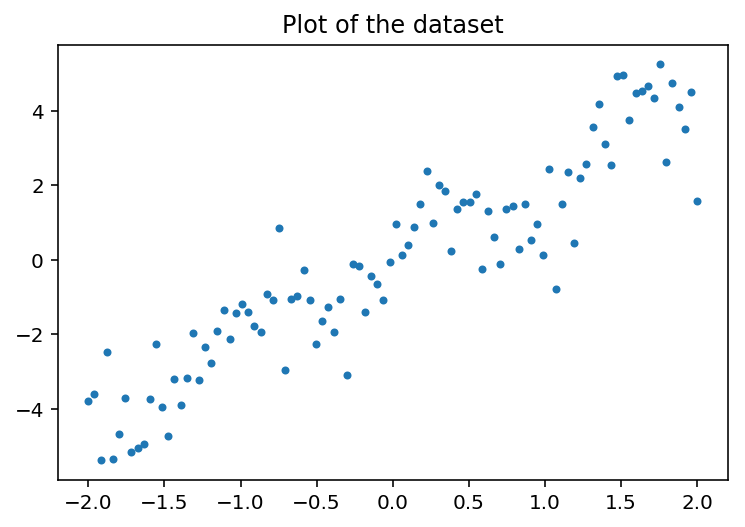

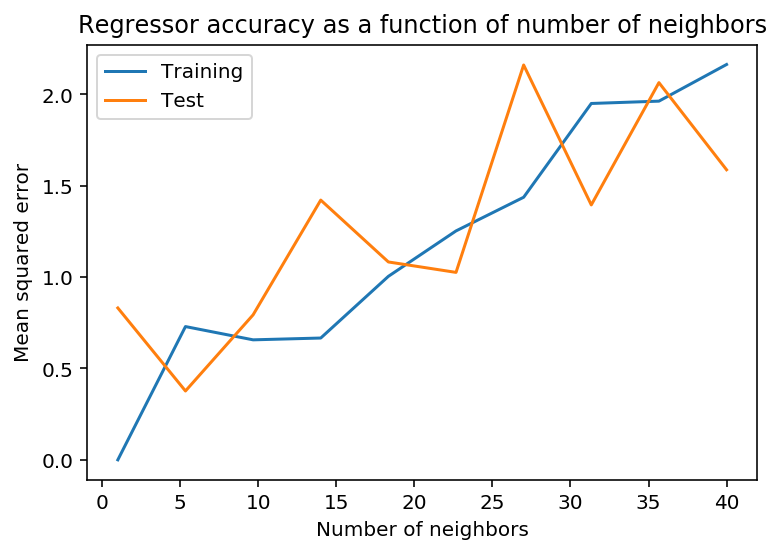

In [14]:
# Your solution
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

X, y = make_regression(n_samples=100, noise_level=0.8, random_state=2)

# plot dataset
plt.figure()
plt.title("Plot of the dataset")
plt.plot(X, y, ".")
plt.show()

# analyze number neighbors
r_train = 0.8
test = np.linspace(1, 40, 10)
sigma_train = []
sigma_test = []

for neighbors in test:
    knr = KNeighborsRegressor(n_neighbors=int(neighbors))
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=r_train, test_size=1-r_train)
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_train)
    sigma_train.append(mean_squared_error(y_train, y_pred))
    y_pred = knr.predict(X_test)
    sigma_test.append(mean_squared_error(y_test, y_pred))
    
plt.figure()
plt.title("Regressor accuracy as a function of number of neighbors")
plt.plot(test, sigma_train, label="Training")
plt.plot(test, sigma_test, label="Test")
plt.xlabel("Number of neighbors")
plt.ylabel("Mean squared error")
plt.legend()
plt.show()

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

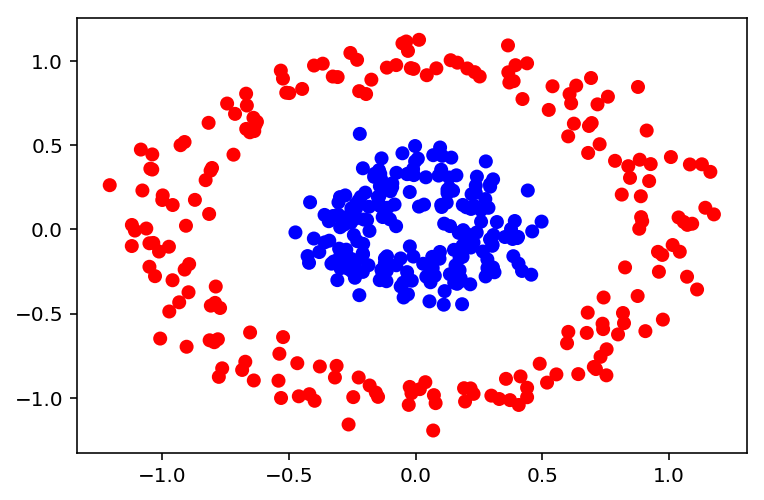

In [6]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

Model Complexity
-------------------

I am not sure if I understood correctly the question, but I decided to increase the complexity by changing the coordinate system. As the radius is the main factor of decision, I have decided to transform the coordinate system 
into polar coordinate. If I wish to avoid loosing information, I should do it carefully by keeping the angle coordinate (which I discard here as I know that we do not need it).

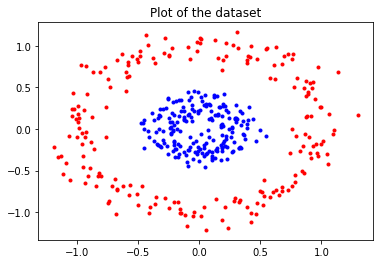

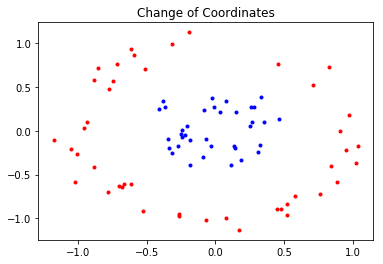

In [13]:
# Your answer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt


X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

# plot dataset
plt.figure()
plt.title("Plot of the dataset")
ind = y == "r"
plt.plot(X[ind,0], X[ind,1], "r.")
ind = y == "b"
plt.plot(X[ind,0], X[ind,1], "b.")
plt.show()

# compute model
lr = LogisticRegression()
x = np.sum(X_train**2, axis=1)
lr.fit(x[:,np.newaxis], y_train)
x = np.sum(X_test**2, axis=1)
y = lr.predict(x[:,np.newaxis])

plt.figure()
plt.title("Change of Coordinates")
ind = y == "r"
plt.plot(X_test[ind,0], X_test[ind,1], "r.")
ind = y == "b"
plt.plot(X_test[ind,0], X_test[ind,1], "b.")
plt.show()